# Exploratory Analysis
---
1. Recieve dataset and convert categorical (yes/no) variables into dummy variables.
2. Observe summary statistics.
3. 

In [30]:
import pandas as pd
import kagglehub
from kagglehub import KaggleDatasetAdapter
from kagglehub.exceptions import KaggleApiHTTPError

# Load the latest version
dataset_paths = [
  "rakeshkapilavai/extrovert-vs-introvert-behavior-data",
  # "shalmamuji/personality-prediction-data-introvert-extrovert"
]

for i, path in enumerate(dataset_paths):
  try:
    ea_df = kagglehub.load_dataset(
      KaggleDatasetAdapter.PANDAS,
      path,
      "personality_dataset.csv"
    )
  except KaggleApiHTTPError:
    print("Dataset unavailable online. Loading local copy.")
    ea_df = pd.read_csv("~/.cache/kagglehub/datasets/rakeshkapilavai/extrovert-vs-introvert-behavior-data/versions/2/personality_dataset.csv")

# Store dataframe to be used in other notebooks
%store ea_df

ea_df

C:\Users\Jared\AppData\Local\Temp\ipykernel_8796\4069237256.py:14: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  ea_df = kagglehub.load_dataset(


Stored 'ea_df' (DataFrame)


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,NaN,Yes,2.0,0.0,Introvert


In [31]:
# Get dimension of dataset
print(ea_df.shape)

# Check for na count
print(ea_df.isna().sum())

# Print summary statistics
ea_df.describe()

(2900, 8)
Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64


,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2837.000000,2838.000000,2834.000000,2823.000000,2835.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.479192,2.903827,2.247327,4.289693,2.926582
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


## Visualize data

### Distribution of Personality Types
There were more extroverts than introverts in the datasets, with extroverts making up ~1500 of participants and introverts making up the other ~1400.

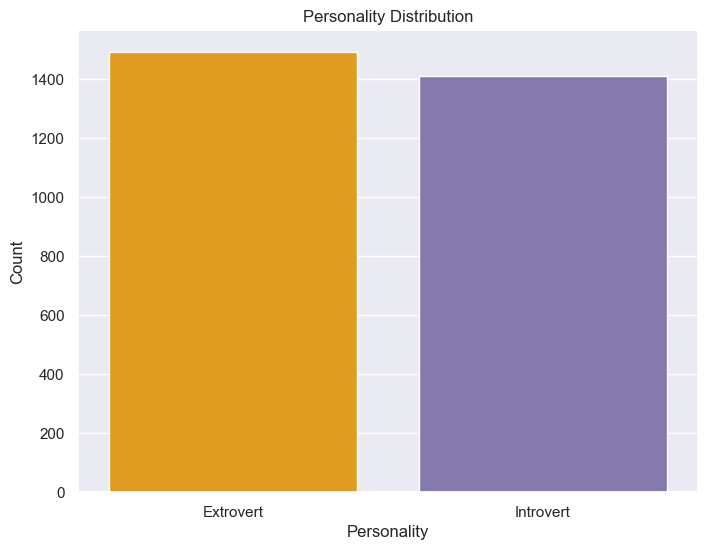

In [32]:
import matplotlib.pyplot as plot
import seaborn as sns

sns.set_theme(style="darkgrid")
palette = {"Extrovert": "orange", "Introvert": "m"}

plot.figure(figsize=(8, 6))
sns.countplot(
    x="Personality",
    data=ea_df,
    palette=palette,
    hue="Personality",
    legend=False
)
plot.title("Personality Distribution")
plot.xlabel("Personality")
plot.ylabel("Count")
plot.show()

### Feature Distributions
Both groups (extrovert & introvert) are clearly different. However, there are more outliers in the introvert group, suggesting that some "introvert" individuals shared some extrovert features. Also notice that for social event attendance, friend circle size, and post frequency, the introvert boxplot appear to be more left-skewed and have a lower average.

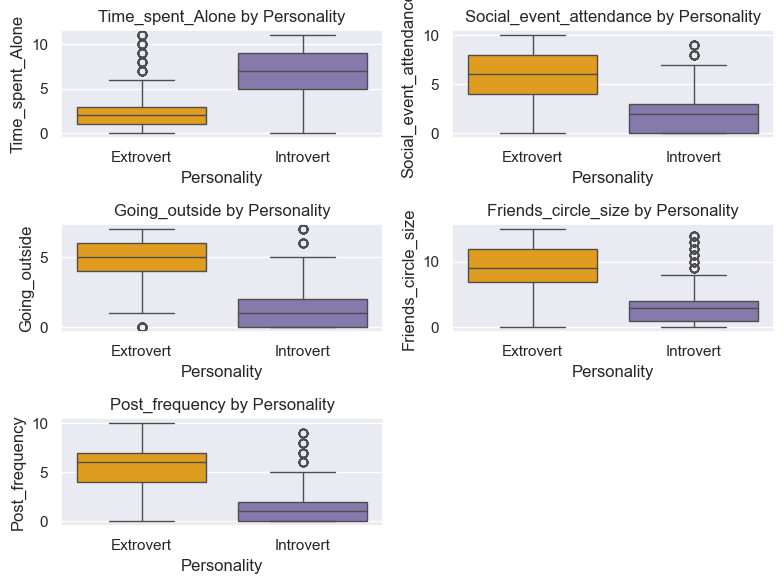

In [33]:
numeric_columns = [
    "Time_spent_Alone",
    "Social_event_attendance",
    "Going_outside",
    "Friends_circle_size",
    "Post_frequency",
]

plot.figure(figsize=(8, 6))
for i, col in enumerate(numeric_columns, 1):
    plot.subplot(3, 2, i)
    sns.boxplot(
        x="Personality",
        y=col,
        data=ea_df,
        palette=palette,
        hue="Personality",
        legend=False
    )
    plot.title("{} by Personality".format(col))
plot.tight_layout()
plot.show()

### Correlation Heatmap

Using the correlation heatmap, we can see that the features with the lowest positive correlation are friend circle size and post frequency. This makes sense as social media participation is not necessarily an introverted nor extroverted activity. It is still a strong correlation, where those with larger friend circle sizes tend to post more to interact with their friends. However, more introverted individuals may have similar rates of post frequency due to activity on larger forums or social media, without having a large friend circle size. This may explain the presence of outliers in the post frequency boxplot above.

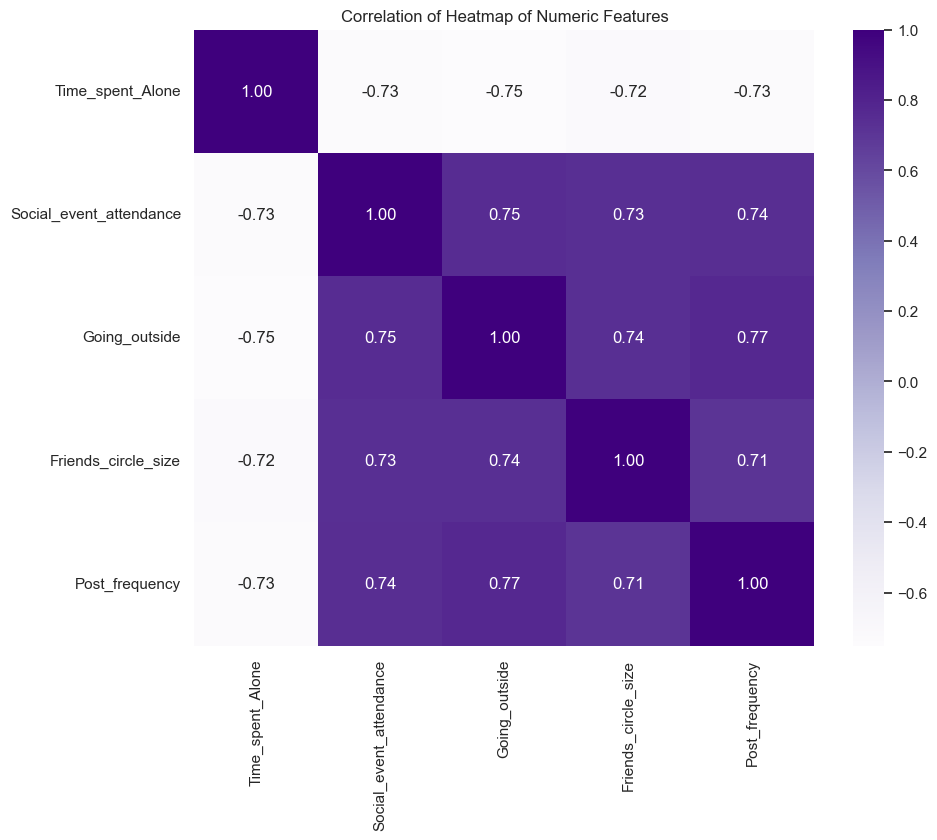

In [34]:
plot.figure(figsize=(10, 8))
sns.heatmap(
    ea_df[numeric_columns].corr(),
    annot=True,
    fmt='.2f',
    cmap="Purples"
)
plot.title("Correlation of Heatmap of Numeric Features")
plot.show()

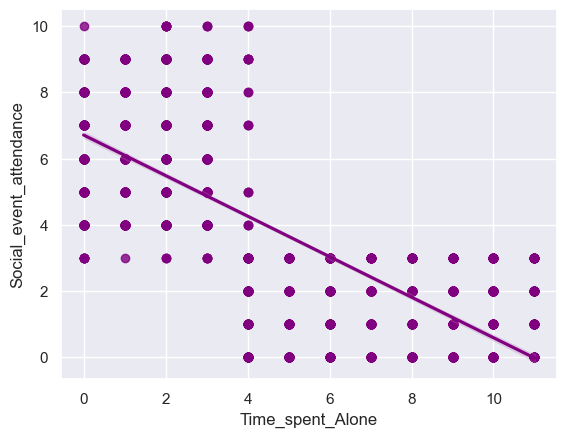

In [ ]:
sns.regplot(
    x='Time_spent_Alone',
    y='Social_event_attendance',
    data=ea_df,
    color="Purple"
)
plot.show()

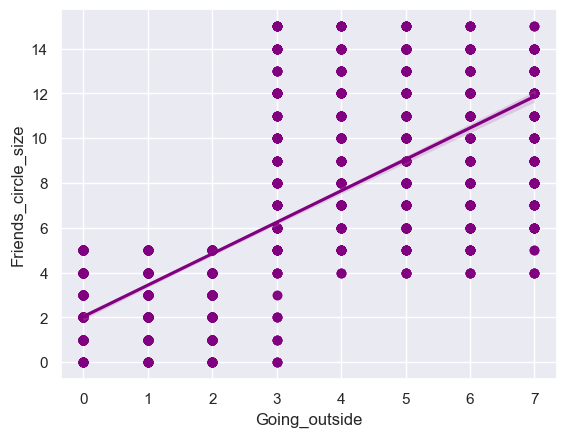

In [ ]:
sns.regplot(
    x='Going_outside',
    y='Friends_circle_size',
    data=df,
    color="Purple"
)
plot.show()